In [2]:
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.linalg import eigh_tridiagonal

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

# The Finite Square Well in $\mathbb R:$

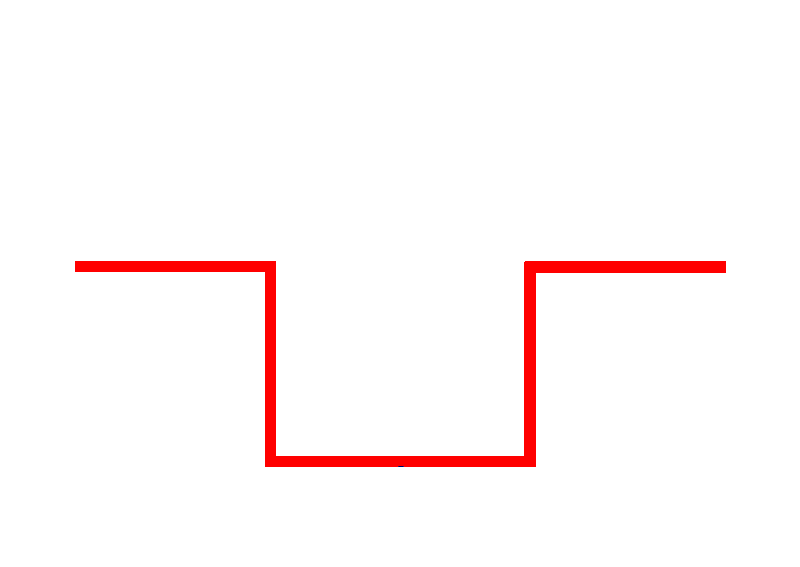

In [3]:
from IPython.display import Image
Image(filename = r'..\Images\square_well.png', width = 1000, height = 1000)

The Hamiltonian $$H=-\frac{\hbar^2}{2m_e}\frac{\partial^2}{\partial x^2}+V(x)$$ can be first used to write the Schrödinger Equation $H\psi(x)=\epsilon\psi(x)$ as $$\Bigg[-\frac{\hbar^2}{2m_e}\frac{\partial^2}{\partial x^2}+V(x)\Bigg]\psi(x)=\epsilon\psi(x)$$ which can be rewritten as $$\Bigg[-\frac{\partial^2}{\partial x^2}+\frac{2m_ea^2}{\hbar^2}V(x')\Bigg]\psi(x')=\frac{2ma^2}{\hbar^2}\epsilon\psi(x')$$ where a characteristic $x'=x/a$ and $a$ is the half-width of the well.

This is done so the well now extends from -1 to 1 instead of $-a$ to $a$. We can then define $$V'=\frac{2ma^2}{\hbar^2}V$$ $$\epsilon'=\frac{2ma^2}{\hbar^2}\epsilon$$ as the characteristic potential and energy to make the problem easier for computation: $$\bigg(-\frac{\partial^2}{\partial x^2}+V'\bigg)\psi(x')=\epsilon'\psi(x')$$

We defined $V'$ in terms of $V$ and now we have $$V_0=-V_0'\frac{\hbar^2}{2m_ea^2}$$ inside the well, where the dimensionless quantity $V_0'$ tells us how many $\hbar^2/2m_ea^2$ there are in $V_0$. 

In summary:

1. Determine $V'$ inside the well using $V_0'=-V_0\bigg(\dfrac{\hbar^2}{2m_ea^2}\bigg)^{-1}$.
2. Solve the eigenenergy equation above for dimensionless energies $\epsilon';$ the energies are $\epsilon=\dfrac{\hbar^2}{2m_ea^2}\epsilon'$.
3. The obtained eigenfunctions $\psi(x')$ where a dimensionless $x'=x/a$, can be used to find the eigenfunctions using the scale transformation $\psi(ax')=\psi(x)$.

We now drop the primes for the sake of readability and convinience, and only consider bound energies where $\epsilon\in(-V_0,0)$. As such, for example, $\sqrt{-\epsilon}$ is real. We have $$\mathrm{Inside}:\hspace{15pt}\bigg(-\dfrac{\partial^2}{\partial x^2}-V_0\bigg)\psi(x)=\epsilon\psi\implies\dfrac{\partial^2\psi}{\partial x^2}=-k^2\psi(x)\hspace{15pt}\mathrm{where}\hspace{15pt}k=\sqrt{\epsilon+V_0}$$ $$\mathrm{Outside}:\hspace{15pt}\bigg(-\dfrac{\partial^2}{\partial x^2}\bigg)\psi(x)=\epsilon\psi\implies\dfrac{\partial^2\psi}{\partial x^2}=l^2\psi(x)\hspace{15pt}\mathrm{where}\hspace{15pt}l=\sqrt{-\epsilon}$$ Since $H$ is symmetric in $x$, the solutions are either even or odd functions. The solutions are thus $$\psi_{\mathrm{even}}=\begin{cases}A\exp(lx)&x<-1\\D\cos(kx)&-1\leq x\leq1\\A\exp(-lx)&x>1\end{cases}$$ $$\psi_{\mathrm{odd}}=\begin{cases}A\exp(lx)&x<-1\\C\sin(kx)&-1\leq x\leq1\\A\exp(-lx)&x>1\end{cases}$$

The Boundary Conditions are that $\psi$ and $\dfrac{\partial\psi}{\partial x}$ are continuous at the boundaries $\pm1$:

- Even: $D\cos(k)=A\exp(-l)$ and $-kD\sin(k)=-lA\exp(-l)$, which yield $k\tan(k)=l$ and thus,$$\sqrt{\epsilon+V_0}\tan(\sqrt{\epsilon+V_0})=\sqrt{-\epsilon}$$
- Odd: $C\sin(k)=A\exp(-l)$ and $kC\cos(k)=-lA\exp(-l)$, which yield $k\cot(k)=-l$ and thus,$$-\sqrt{\epsilon+V_0}\cot(\sqrt{\epsilon+V_0})=\sqrt{-\epsilon}$$

# Computing the Energies $\epsilon$ Analytically:

We get the $V_0$ values corresponding to bound states $\epsilon\in[-V_0,0]$. Note that $V_0$ set at any value in the code is actually that value multiplied by the factor $\dfrac{\hbar^2}{2m_ea^2}$.

In [34]:
V_0 = 36
epsilon = np.linspace(-V_0, 0, 100000)

The LHSs and RHS of the two aforementioned equations:

In [35]:
RHS = np.sqrt(-epsilon)

LHS_1 = np.sqrt(epsilon + V_0) * np.tan(np.sqrt(epsilon + V_0))
LHS_2 = -np.sqrt(epsilon + V_0) / np.tan(np.sqrt(epsilon + V_0 + 1e-09))

Plotting, where the energies are along $x$ whereas the red curve representing the RHS interacts with the LHSs of the two equations:

Text(0, 0.5, '$\\mathrm{LHS}_i\\,\\mathrm{or}\\,RHS$')

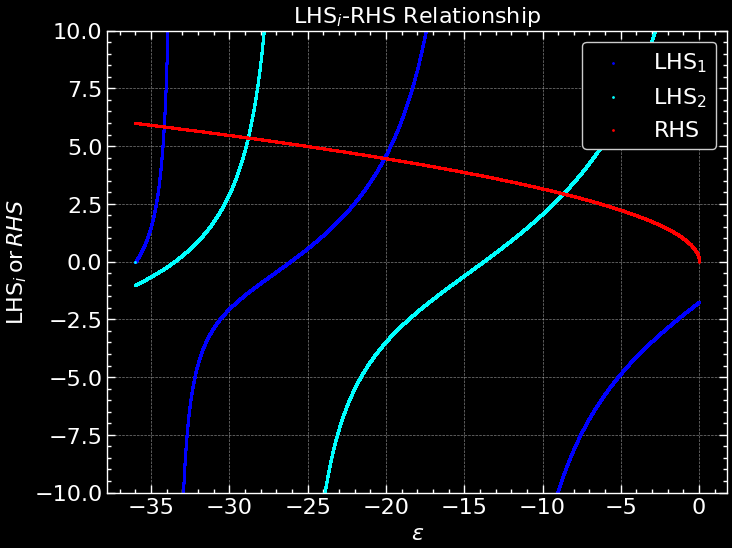

In [36]:
plt.scatter(epsilon, LHS_1, s = 1, color  = 'blue', label = r'$\mathrm{LHS}_1$')
plt.scatter(epsilon, LHS_2, s = 1, color = 'cyan', label = r'$\mathrm{LHS}_2$')
plt.scatter(epsilon, RHS, s = 1, color = 'red', label = r'RHS')

plt.legend(loc = 'upper right')
plt.ylim(-10, 10)

plt.title(r'$\mathrm{LHS}_i$-RHS Relationship')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\mathrm{LHS}_i\,\mathrm{or}\,RHS$')

We can observe that there are 4 possible 'intersections' or bound energy states in this Finite Square Well. Let's solve for these.

Below, `f1` corresponfs to `RHS-LHS_1` and `f2` corresponfs to `RHS-LHS_2`. The energies making these expressions equal to zero correspond to the intersection points.

In [37]:
def f1(epsilon, V_0):
    return np.sqrt(epsilon + V_0) * np.tan(np.sqrt(epsilon + V_0)) - np.sqrt(-epsilon)

def f2(epsilon, V_0, delta = 1e-10):
    return np.sqrt(epsilon + V_0 + delta) / np.tan(np.sqrt(epsilon + V_0 + delta)) + np.sqrt(-epsilon)

Plotting `f1` and `f2` as functions of energy:

Text(0, 0.5, '$f_i$')

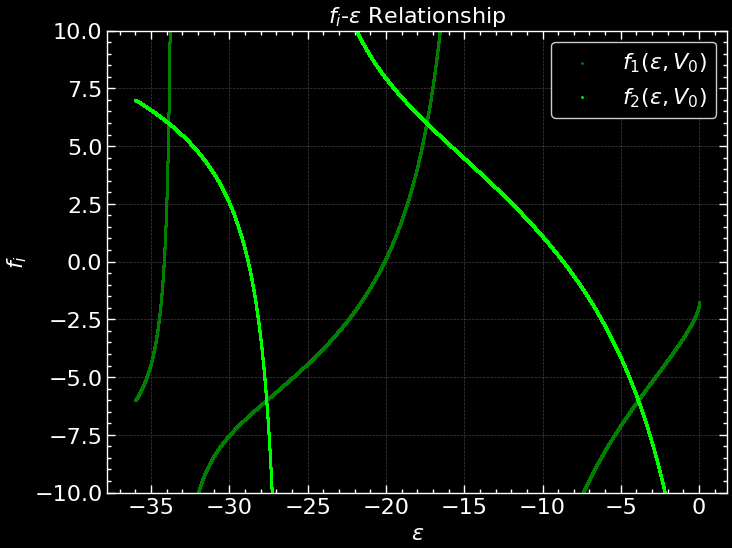

In [38]:
plt.scatter(epsilon, f1(epsilon, V_0), s = 1, color = 'green', label = r'$f_1(\epsilon,V_0)$')
plt.scatter(epsilon, f2(epsilon, V_0), s = 1, color = 'lime', label = r'$f_2(\epsilon,V_0)$')

plt.grid(color = 'grey')
plt.legend(loc = 'upper right')
plt.ylim(-10, 10)

plt.title(r'$f_i$-$\epsilon$ Relationship')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$f_i$')

Now, it's set up for us so that the energies corresponding to the regions where the 'clue curves' above intersect $y=()$ are the bound energies of the system. We just have to 'find $x$ such that some $f(x)=()$', and how this is done on a computer is shown:

In [39]:
f1_values = f1(epsilon, V_0)
f2_values = f2(epsilon, V_0)

zero_crossings_even = np.where(np.diff(np.sign(f1_values)) * (np.abs(f1_values[:-1]) < 3).astype(float))[0]
zero_crossings_odd = np.where(np.diff(np.sign(f2_values)) * (np.abs(f2_values[:-1]) < 3).astype(float))[0]
zero_crossings = np.sort(np.concatenate([zero_crossings_even, zero_crossings_odd]))

epsilon_values_m1 = (epsilon[zero_crossings] + epsilon[zero_crossings + 1]) / 2
epsilon_values_m1

array([-34.19152192, -28.82422824, -20.11322113,  -8.68922689])

The Consecutive Difference is:

In [40]:
np.diff(np.sign(f1_values))

array([0., 0., 0., ..., 0., 0., 0.])

The First Excited State, for example, is $\epsilon'_i=-28.82$. The real energy value is actually $$\epsilon_1=-28.82\frac{\hbar^2}{2m_ea^2}$$

# Solving Numerically:

The equation (primes dropped): $$\Bigg[-\frac{\partial^2}{\partial x^2}+V(x)\Bigg]\psi(x)=\epsilon\psi(x)$$ is an example of an eigenenergy problem over a continuous domain. By discretizing $x$ ($N$ equally spaced values), we can turn this Differential Operator eigenenergy problem into a Matrix Equation eigenenergy problem over an $N$-dimensional vector space.

If $x$ is made discrete, it can only take on values $x_i$ with spacing $\delta x$. The corresponding values a function takes at these $x_i$ values is defined as $f_i\equiv f(x_i)$. In our case, we have $x_i$ and $\psi_i$ values. 

Using the fact that $$\frac{\partial^2\psi}{\partial x^2}(x_i)\approx\frac{\psi_{i+1}+\psi_{i-1}-2\psi_i}{\delta x^2}$$ we can rewrite the Schrödinger Equation as $$\frac{\psi_{i+1}+\psi_{i-1}-2\psi_i}{\delta x^2}+V_i\psi_i=\epsilon_i\psi_i$$ Assuming the wavefunction decays sufficiently fast outside the well, we can assume $\psi_0=\psi_N$ as the Boundary Conditions.

Since this holds $\forall\psi_i$, it can be expressed as a matrix eigenenergy equation. Our Schrödinger Equation $H\psi=\epsilon\psi$ becomes the equation below, where the Hamiltonian $H$ is now a matrix: $$\begin{bmatrix}\dfrac 2{\delta x^2}+V_1&-\dfrac 1{\delta x^2}&0&0\cdots\\-\dfrac 1{\delta x^2}&\dfrac 2{\delta x^2}+V_2&-\dfrac 1{\delta x^2}&0\cdots\\\cdots&\cdots&\cdots&-\dfrac 1{\delta x^2}\\\cdots 0&0&-\dfrac 1{\delta x^2}&\dfrac 2{\delta x^2}+V_{N-1}\end{bmatrix}\begin{bmatrix}\psi_1\\\psi_2\\\psi_3\\\psi_4\\\cdots\\\psi_{N-1}\end{bmatrix}=\epsilon\begin{bmatrix}\psi_1\\\psi_2\\\psi_3\\\psi_4\\\cdots\\\psi_{N-1}\end{bmatrix}$$

We make 100000 $x\in[-3,3]$ values, where the well goes from -1 to 1:

In [41]:
N = 100000

x = np.linspace(-3, 3, N)
dx = np.diff(x)[0]

We also create a main diagonal and off-digonal of the reidiagonal matrix aforementioned:

In [42]:
main_diag = 2 * np.ones(N) / dx ** 2 - V_0 * ((x >= -1) * (x <= 1)).astype(float)
main_diag[0] -= 1 / dx ** 2
main_diag[-1] -= 1 / dx ** 2

off_diag = -np.ones(N - 1) / dx ** 2

We use the `eigh_tridiagonal` SymPy function to solve for the eigenenergies `epsilon_values` and eigenvectors `psi_values` of this matrix, as well as the `select_range` option to only find the eigenenergies in the given range, corresponding to the bound states:

In [43]:
epsilon_values_m2, psi_values = eigh_tridiagonal(main_diag, off_diag, select = 'v', select_range = (-V_0, 0))

Plotting a sample Eigenvector:

Text(0, 0.5, '$|\\psi_i(x)|^2$')

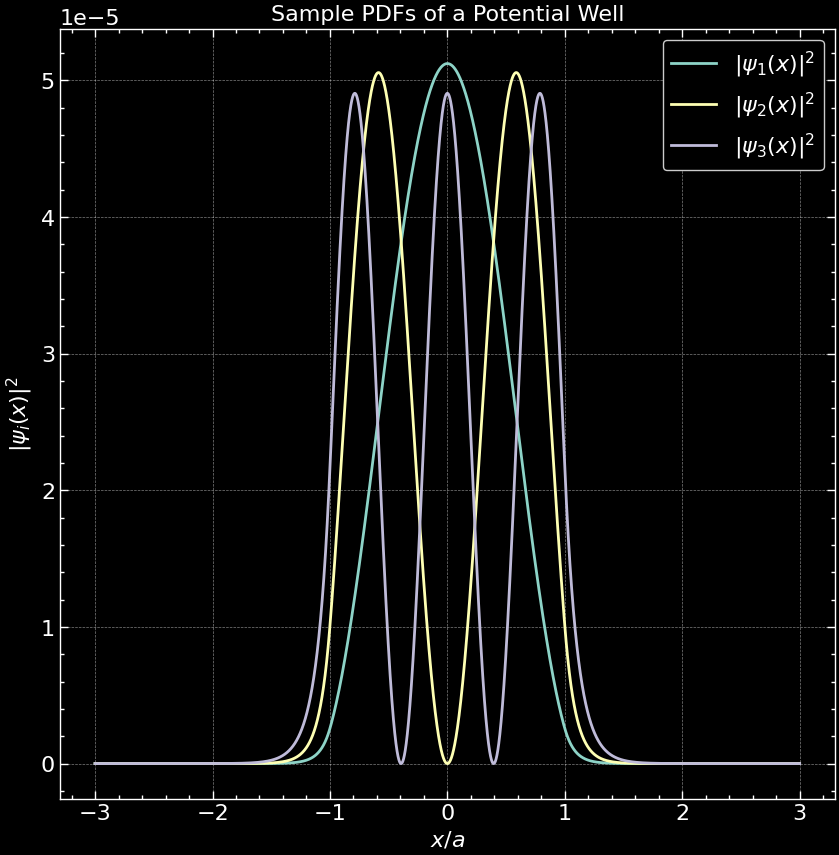

In [44]:
plt.figure(figsize = (10, 10))

plt.plot(x, np.abs(psi_values.T[0]) ** 2, label = r'$|\psi_1(x)|^2$')
plt.plot(x, np.abs(psi_values.T[1]) ** 2, label = r'$|\psi_2(x)|^2$')
plt.plot(x, np.abs(psi_values.T[2]) ** 2, label = r'$|\psi_3(x)|^2$')

plt.legend()
plt.title('Sample PDFs of a Potential Well')
plt.xlabel(r'$x/a$')
plt.ylabel(r'$|\psi_i(x)|^2$')

Comparing the two methods we applied to get the $\epsilon$'s:

In [45]:
epsilon_values_m1

array([-34.19152192, -28.82422824, -20.11322113,  -8.68922689])

In [46]:
epsilon_values_m2

array([-34.19173723, -28.82448397, -20.11396902,  -8.6905795 ])

In [47]:
errs = 100 * np.abs(epsilon_values_m1 - epsilon_values_m2) / (0.5 * (epsilon_values_m1 + epsilon_values_m2))
errs

array([-0.00062972, -0.00088719, -0.00371832, -0.01556524])

The errors appear to increase in orders of magnitude the further energies we calculate.

# A Sequence of Wells in $\mathbb R$ (Analogus to a Crystal Structure):

Suppose we have a sequence of curved wells spaced a distance $b$ apart. A preliminary plot would be of the form:

Text(0, 0.5, '$V(x)$')

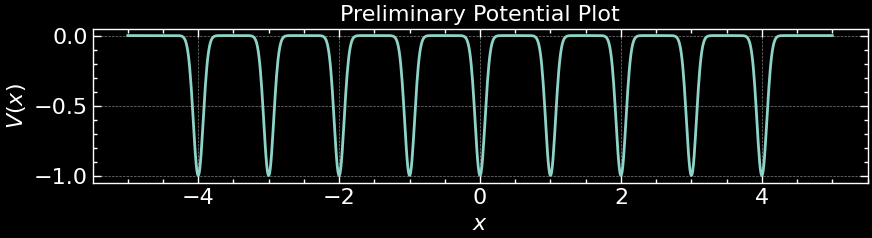

In [146]:
x = np.linspace(-5, 5, 1000)
V = np.sum([-np.exp(-(x - a) ** 2 / 0.01) for a in range(-4, 5)], axis = 0)

plt.figure(figsize = (10, 2))
plt.plot(x, V)

plt.title('Preliminary Potential Plot')
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x)$')

This can be used as a model for a crystal/solid, where each well represents a positively charged nucleus or proton. 

We need to find out the allowed eigenstates and eigenenergies if we insert an electron in this system. We can apply the *Linear Combination of Atomic Orbitals (LCAO) Approximation,* a model which assumes that molecular states are linear combinations of known atomic states. We'll use the notation $\ket{i}_j$ as the $i^{\mathrm{th}}$ excited state of the $j^{\mathrm{th}}$ well. The LCAO Approximation says that any state can be represented as $$\ket\psi=\sum_i\sum_j\ket{i}_j$$ and thus the $\ket{i}_j$ form a complete basis.

Suppose we have 3 wells, each with two states, a ground and a excited one. We can write any state in vector form as $$\ket\psi=\begin{bmatrix}c_1\\c_2\\c_3\\c_4\\c_5\\c_6\end{bmatrix}\begin{matrix}\to\ket{0}_0\\\to\ket{1}_0\\\to\ket{0}_1\\\to\ket{1}_1\\\to\ket{0}_2\\\to\ket{1}_2\end{matrix}$$ where the $c$'s are the component of each of the $\ket{i}_j$ of the basis: $$\ket\psi=c_1\ket{0}_0+c_2\ket{1}_0+c_3\ket{0}_1+c_4\ket{1}_1+c_5\ket{0}_2+c_6\ket{1}_2$$

The Hamiltonian $H=T+\sum_iV_i$ of the full 'well-system' can be written in the basis of these $\ket{i}_j$ where each element of the matrix $H$ is $$\bra{i'}_{j'}H\ket{i}_j$$ and once we have this matrix and get these elements, we can solve for the eigensolutions using the fact that $$H=H_j+\hat V_j$$ where $H_j=T+V_j$ is the Hamiltonian of a well and $\hat V_j=\sum_{m\neq j}V_m$ is the potential from all the adjacent wells. 

Letting an $n=j-j'$ represent the number of wells apart, the matrix elements are $$\bra{i'}_{j'}H_j+\hat V_j\ket{i}_j$$ which is $$\bra{i'}_{j'}\epsilon_j+\hat V_j\ket{i}_j$$ and using the standard bra-ket notation, this comes to $$\bra{i'}_{j'}H\ket{i}_j=\int_{\mathbb R}\phi_i^*(x\pm nb)\big[\epsilon_i+\hat V(x)\big]\phi_i(x)\,dx$$ where $\mathbb R$ represents an integration over the whole of Real Space $(-\infty,\infty)$ and $\phi^*$ is the conjugate of $\phi$. From what we previously did, we'll write a function that solves for the eigenstates with energies less than zero (bound eigenstates) of some finite square wells:

In [147]:
def solve_single_well(x, V, V_0):
    N = len(x)
    dx = np.diff(x)[0]

    main_diag = 2 * np.ones(N) / dx ** 2 + V(x, V_0)
    off_diag = -np.ones(N - 1) / dx ** 2
    
    epsilon_values, psi_values = eigh_tridiagonal(main_diag, off_diag, select = 'v', select_range = (-V_0, 0))
    psi_values = psi_values / np.sqrt((np.abs(psi_values) ** 2).sum(axis = 0) * dx)
    return epsilon_values, psi_values.T

Defining the constants in terms of electronvolt units and the factor making the potential dimensionless for python:

In [148]:
hbar = 6.582112e-16
m_e = 0.510999e+06 * (3e+08) ** (-2)
a = 0.35e-09 / 2

factor = hbar ** 2 * (2 * m_e * a ** 2) ** (-1)

# Sample Wells:

### 1. A Finite Square Well with a Single Bound State:

- $V_0=1$ electronvolt
- Well Width $2a=0.35$ nanometers
- Well Spacing $b=3\times 2a$

### 2. A Finite Square Well with Two Bound States:

- $V_0=5$ electronvolts
- Well Width $2a=0.35$ nanometers
- Well Spacing $b=3\times 2a$

### 3. A Gaussian Well:

- $V=V_0\exp\bigg(-\dfrac {3x}a\bigg)^2$ where $V_0\bigg(\dfrac{\hbar^2}{2m_ea^2}\bigg)^{-1}=36$ 
- Well Spacing $b=2\times 2a$

In [165]:
example = 3 # CHANGE THIS AS YOU PLEASE

In [166]:
if example == 1:
    V_0 = 1
    V_0 = V_0 / factor
    b = 3 * 2

if example == 2:
    V_0 = 5
    V_0 = V_0 / factor
    b = 3 * 2

if example == 3:
    V_0 = 36
    b = 2 * 2

    factor = 1

We define the Potential for the choice of an example well:

In [167]:
N = 100000

x = np.linspace(-15, 15, N)
if example == 1 or example == 2:
    def V(x, V0):
        return -V0 * np.array((x >= -1) * (x <= 1), dtype=float)
elif example == 3:
    def V(x, V0):
        return -V0 * np.exp(-(3 * x) ** 2)

Text(0, 0.5, '$V(x, V_0)$')

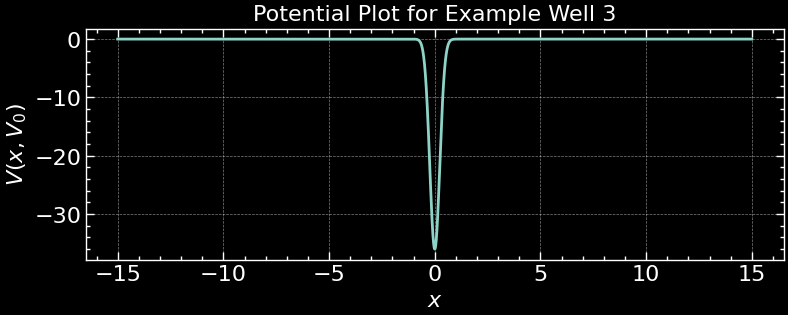

In [168]:
plt.figure(figsize = (9, 3))
plt.plot(x, V(x, V_0))

plt.title(r'Potential Plot for Example Well {}'.format(example))
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x, V_0)$')

Dimension-'full' Energies:

In [169]:
epsilon_values, psi_values = solve_single_well(x, V, V_0)
factor * epsilon_values

array([-21.37895221,  -1.35778458])

Eigenstates or wavefunctions:

Text(0, 0.5, '$\\psi(x, V_0)$')

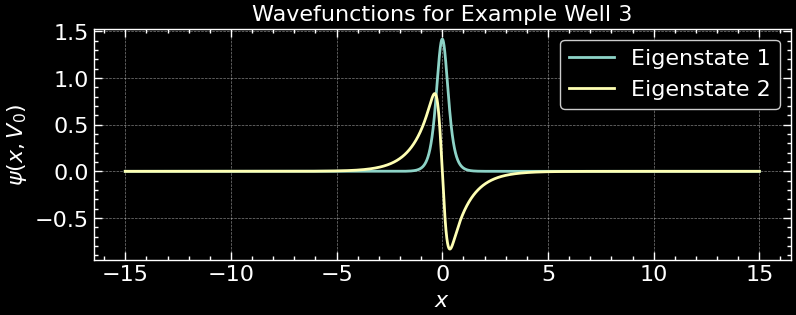

In [175]:
plt.figure(figsize = (9, 3))
[plt.plot(x, psi, label = r'Eigenstate {}'.format(np.where(psi_values == psi)[0][0] + 1)) for psi in psi_values]

plt.title(r'Wavefunctions for Example Well {}'.format(example))
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi(x, V_0)$')

For solving our integral, we create a function that can compute the eigenstates at any point $x$ and define $\hat V(x)$ as the potential from all wells except that centered at $x=0$:

In [176]:
psi_values_f = [interp1d(x, psi, bounds_error = False, fill_value = (0, 0)) for psi in psi_values]

def Vp_f(x, b, V_0):
    return V((x - b / 2) % b - b / 2, V_0) - V(x, V_0)

Plotting the ground state wavefunction from consecutive wells, along with $V'(x)$:

Text(0, 0.5, '$\\psi_0(x,V_0)\\,|\\,\\hat{V}(x)$')

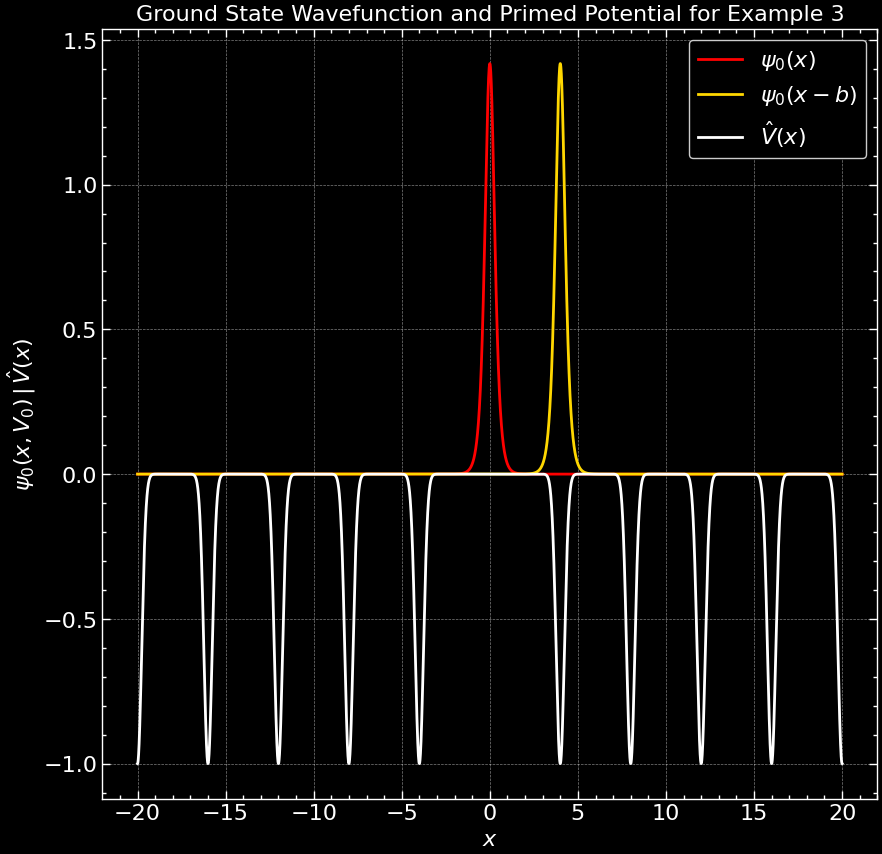

In [177]:
x_large = np.linspace(-20, 20, 10000)
plt.figure(figsize = (10, 10))

plt.plot(x_large, psi_values_f[0](x_large), color = 'red', label = r'$\psi_0(x)$')
plt.plot(x_large, psi_values_f[0](x_large - b), color = 'gold', label = r'$\psi_0(x-b)$')
plt.plot(x_large, Vp_f(x_large, b, V_0) / V_0, color = 'white', label = r'$\hat{V}(x)$')

plt.title(r'Ground State Wavefunction and Primed Potential for Example {}'.format(example))
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$\psi_0(x,V_0)\,|\,\hat{V}(x)$')

The function that computes the integral $$\int_{\mathbb R}\phi_i^*(x\pm nb)\big[\epsilon_i+\hat V(x)\big]\phi_i(x)\,dx$$ is given below. Also, `i_1` and `i_2` replace $i$ and $i'$ in the integral, and we can assume that the $\pm$ sign can be generalized here.

In [179]:
def compute_integral(psi_values_f, epsilon_values, i1, i2, b, V_0, n):
    return quad(lambda x: psi_values_f[i1](x) * psi_values_f[i2](x - n * b) * (epsilon_values[i1] + Vp_f(x, b, V_0)), -20, 20,
                points = [n * b for n in range(-6, 6)], limit = 1000)[0]

factor * compute_integral(psi_values_f, epsilon_values, 0, 0, b = 6, V_0 = V_0, n = 1)

-1.5380149840051426e-09

# Filling the $6\times 6$ matrix $H$:

Creating $H$ and filling off its diagonals:

In [180]:
N_wells = 20
N_states = len(epsilon_values)

H = np.zeros((N_wells * N_states, N_wells * N_states))

In [181]:
psi_values_tot = N_wells * psi_values_f
epsilon_values_tot = N_wells * list(epsilon_values)

for i1 in range(H.shape[0]):
    for i2 in range(i1, H.shape[0]):
        well_1_idx = i1 // N_states
        well_2_idx = i2 // N_states

        H[i1, i2] = compute_integral(psi_values_tot, epsilon_values_tot, i1, i2, b = b, V_0 = V_0, n = well_2_idx - well_1_idx)

H += H.T

In [182]:
main_diag = np.array(list(epsilon_values) * N_wells)
H[np.diag_indices(H.shape[0])] = main_diag

A visual representation of the Hamiltonian:

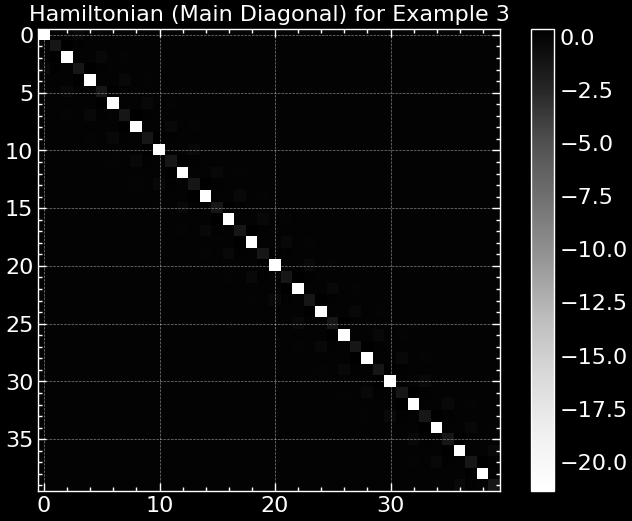

In [183]:
plt.imshow(H, cmap = 'Greys')
plt.title('Hamiltonian (Main Diagonal) for Example {}'.format(example))
plt.colorbar()

Solving for the allowed energies of an electron in this system:

Text(0.5, 1.0, 'Allowed Energies for Example 3')

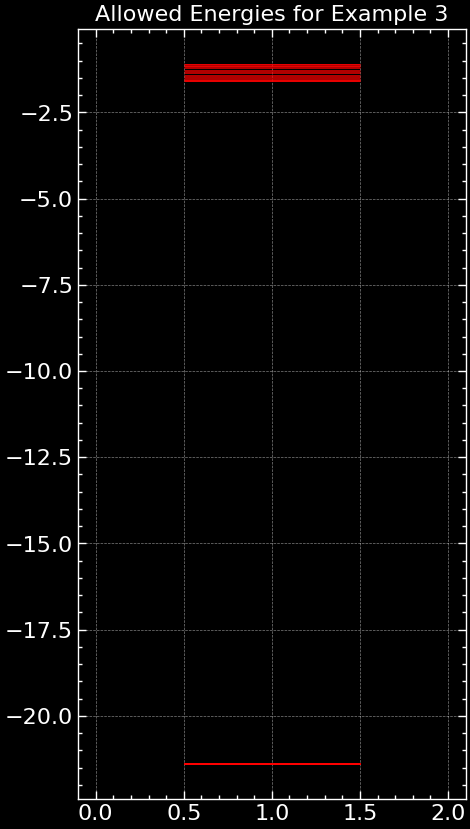

In [185]:
eigenenergies, eigenvectors = np.linalg.eigh(H)

plt.figure(figsize = (5, 10))
plt.eventplot(factor * eigenenergies, orientation = 'vertical', colors = 'red', linewidth = 0.5)
plt.title('Allowed Energies for Example {}'.format(example))

In [186]:
eigenenergies

array([-21.40124597, -21.40124536, -21.39977253, -21.39977022,
       -21.39746258, -21.39745779, -21.39452121, -21.39451363,
       -21.39120959, -21.39119943, -21.38782184, -21.38780979,
       -21.38465895, -21.38464591, -21.38200216, -21.38198881,
       -21.38008837, -21.38007387, -21.37909388, -21.37906423,
        -1.59169285,  -1.58355975,  -1.57019826,  -1.55189484,
        -1.52904249,  -1.50213293,  -1.47174689,  -1.43854263,
        -1.40324295,  -1.36662076,  -1.32948347,  -1.2926563 ,
        -1.25696471,  -1.22321615,  -1.19218148,  -1.16457641,
        -1.1410434 ,  -1.12213481,  -1.10829764,  -1.09986093])